In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import functions

In [2]:
mockito = functions.process_project_data('mockito',exploratory=True)
wildfly = functions.process_project_data('wildfly',exploratory=True)
ant = functions.process_project_data('ant',exploratory=True)


#### Remove outliers

In [3]:
mockito = functions.limit_data_dict(mockito)
wildfly = functions.limit_data_dict(wildfly)
ant = functions.limit_data_dict(ant)

#### Working with mockito 17 and wildfly 16

In [4]:
mockDf = mockito['v17']
wildDf = wildfly['v16']
antDf = ant['v10']

### Checking outliers:
- wildfly seems to have more bugs in general.
- metrics show a similar pattern for both projects.

,cbo,noc,cyclomatic,dit,lcom,rfc,wmc,code_smell,bug
count,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000
mean,0.373679,0.052954,0.898431,0.246746,1.111136,0.716542,2.225164,0.085660,0.054622
std,1.598558,0.796688,1.278188,0.567507,6.752622,3.049615,4.371850,0.642131,0.227254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,56.000000,53.000000,25.000000,5.000000,59.000000,57.000000,59.000000,16.000000,1.000000


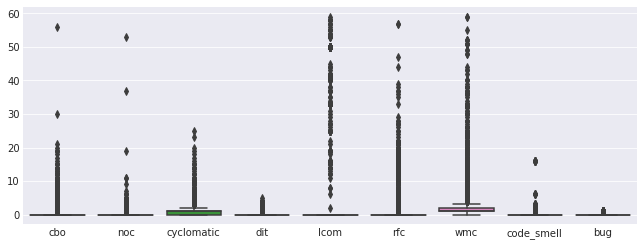

In [5]:
plt.figure(figsize=(11,4))
sns.boxplot(data=mockDf)
mockDf.describe()

plt.figure(figsize=(11,4))
sns.boxplot(data=wildDf)
wildDf.describe()

plt.figure(figsize=(11,4))
sns.boxplot(data=antDf)
antDf.describe()

### HeatMaps

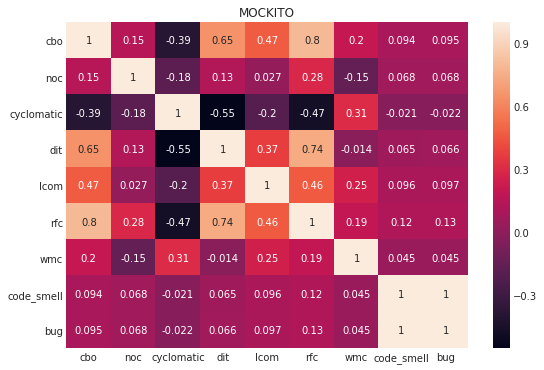

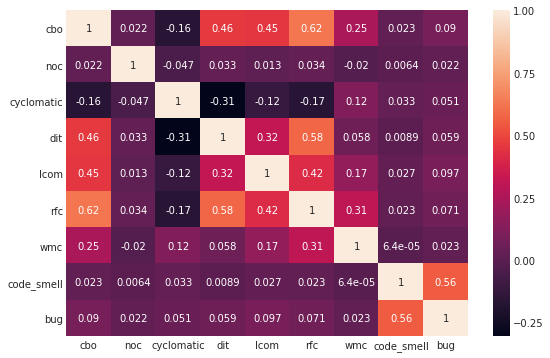

In [6]:
plt.figure(figsize=(9,6))
plt.title("MOCKITO")
corr = mockDf.corr(method='spearman')
sns.heatmap(corr,annot=True)
plt.show()
plt.figure(figsize=(9,6))
corr = mockDf.corr(method='pearson')
sns.heatmap(corr,annot=True)
plt.show()


plt.figure(figsize=(9,6))
plt.title("WILDFLY")
corr = wildDf.corr(method='spearman')
sns.heatmap(corr,annot=True)
plt.show()
plt.figure(figsize=(9,6))
corr = wildDf.corr(method='pearson')
sns.heatmap(corr,annot=True)
plt.show()


plt.figure(figsize=(9,6))
plt.title("ANT")
corr = antDf.corr(method='spearman')
sns.heatmap(corr,annot=True)
plt.show()
plt.figure(figsize=(9,6))
corr = antDf.corr(method='pearson')
sns.heatmap(corr,annot=True)
plt.show()


#fig = plt.figure(figsize=(300,300))
sns.pairplot(data=mockDf,kind='reg',diag_kind='kde')
#plt.savefig('MOCKDF.png')

#fig = plt.figure(figsize=(300,300))
sns.pairplot(data=antDf,kind='reg',diag_kind='kde')
#plt.savefig('ANT.png')

for col in mockDf.columns:
    fig = plt.figure(figsize=(6,5))
    sns.distplot(mockDf[col])
    plt.show()

### Regression plots after loglinear transformation

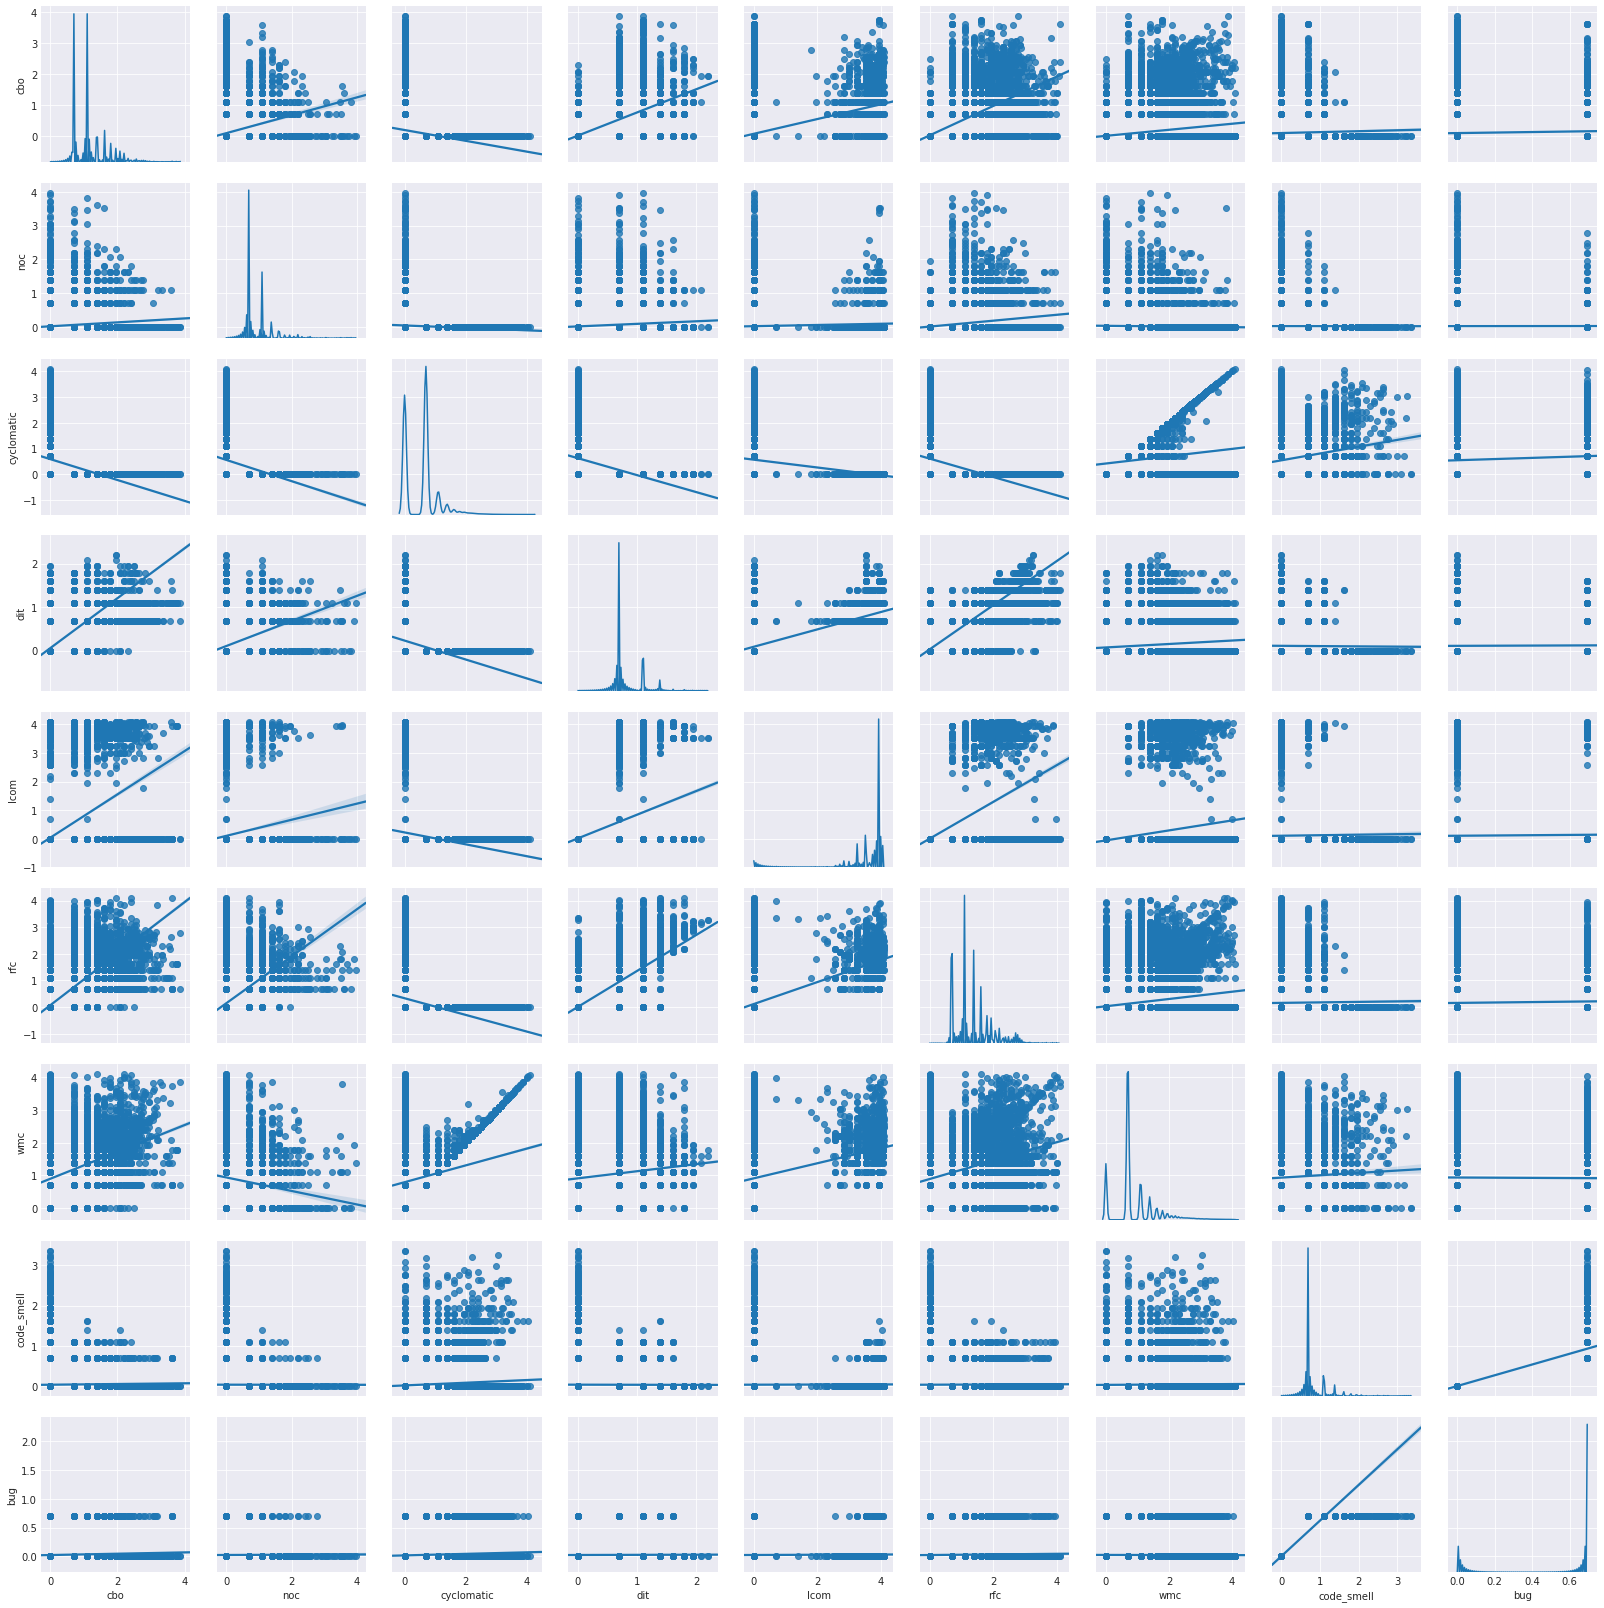

In [27]:
#fig = plt.figure(figsize=(300,300))
sns.pairplot(data=wildDf.apply(np.log1p),kind='reg',diag_kind='kde')
#plt.savefig('wildDF.png')